In [1]:
from pymongo import MongoClient
client = MongoClient()

In [3]:
db = client['reddit']

In [4]:
db.relations.find_one()

{'_id': '00002d7f79aa6bf7',
 'sub_a': 'bicycling',
 'sub_b': 'bikewrench',
 'timestamp': '2017-11-26 18:52:01'}

In [5]:
import networkx as nx
G = nx.Graph()

In [6]:
db.subreddits.find_one({'type': 'private'})

{'_id': '1066thworldproblems',
 'description': 'The ancient Ringworld lies abandoned, its creators long since departed.',
 'keywords': ['departed',
  'since',
  'long',
  'creators',
  'abandoned',
  'lies',
  'ringworld',
  'ancient'],
 'subscribers': -1,
 'timestamp': '2017-11-28 02:46:11',
 'type': 'private'}

In [1]:
subs = db.subreddits.find()
nodes = [(sub['_id'],{'type': sub['type']}) for sub in subs]

NameError: name 'db' is not defined

In [8]:
G.add_nodes_from(nodes)

In [9]:
relations = db.relations.find()
edges = [(r['sub_a'], r['sub_b']) for r in relations]

In [10]:
G.add_edges_from(edges)

### Plotting subgraph:

In [11]:
s_nodes = nodes[:1000]
s_edges = [edge for edge in edges if edge[0] in s_nodes and edge[1] in s_nodes]

In [12]:
small_g = nx.Graph()

In [13]:
small_g.add_nodes_from(s_nodes)
small_g.add_edges_from(s_edges)

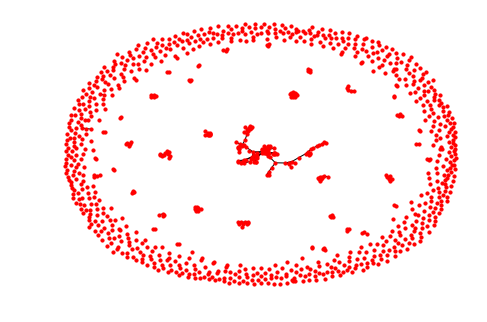

In [15]:
import matplotlib.pyplot as plt

nx.draw(small_g, node_size=10)
plt.show()

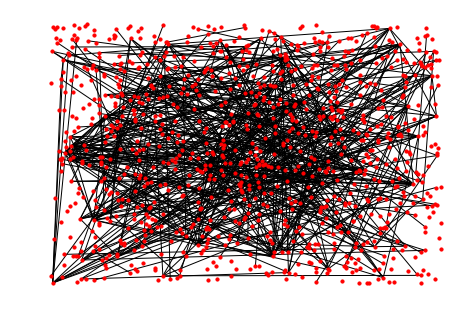

In [39]:
nx.draw_random(small_g, node_size=10)
plt.show()

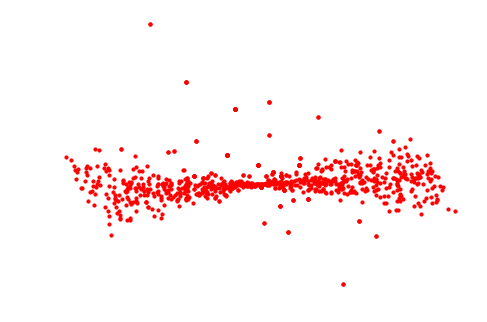

In [35]:
nx.draw_spectral(small_g, node_size=10)
plt.show()

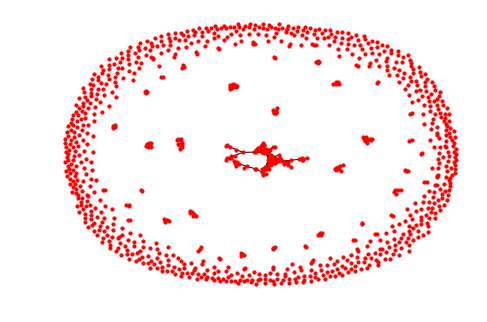

In [36]:
nx.draw_spring(small_g, node_size=10)
plt.show()

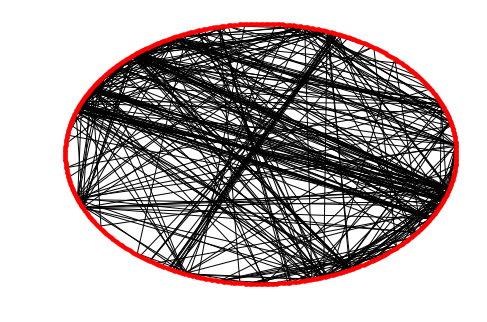

In [32]:
nx.draw_shell(small_g, node_size=10)
plt.show()

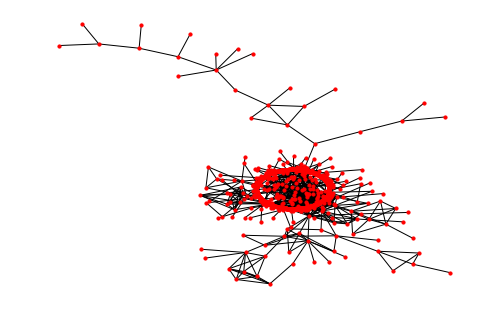

In [41]:
nx.draw_kamada_kawai(small_g, node_size=10, alpha=1)
plt.show()

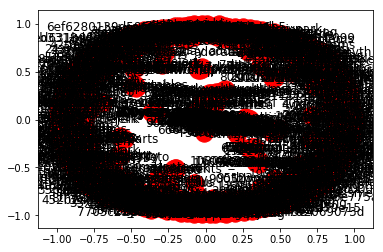

In [29]:
nx.draw_networkx(small_g)
plt.show()